                                                              Importing modules

In [1]:
import scipy.stats as sps
import scipy.optimize as spo
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
import pyreadr

In [2]:
#  Создает список range(num)
def generateNumber(num):
    list = []
    for i in range(num+1):
        list.append(i)
    return list

                                     С Л У Ч А Й      Н О Р М А Л Ь Н О Г О     Р А С П Р Е Д Е Л Е Н И Я

In [3]:
def normal_array(N,T,mu,sigma):
    A=np.zeros([N,T])
    for i in range(N):
        A[i,:]=sps.norm.rvs(loc=mu,scale=sigma,size=T)
    return A

In [4]:
# Генерация нормальной выборки
N_norm=1000
T_norm=10
mu=0
sigma=1
Normal=normal_array(N_norm,T_norm,mu, sigma)
Normal

array([[ 1.5612037 ,  0.42301956,  0.60373931, ...,  0.97098574,
         1.04985458, -1.05479851],
       [ 1.63791166, -0.54664576,  0.50564394, ...,  0.47415421,
         1.46416136, -1.50989864],
       [ 0.2025769 ,  1.13835108, -0.31199134, ...,  0.2049345 ,
        -0.74716001, -0.38381313],
       ...,
       [-1.66505517,  0.80158261, -1.44130808, ..., -0.94941091,
         0.95222002,  1.64004094],
       [-0.71496431, -0.07616972, -1.09377789, ...,  2.62619279,
         0.00360112,  0.00629277],
       [ 0.76072976, -0.99504655, -1.10770554, ...,  0.42420284,
        -0.08959878,  0.85542789]])

In [5]:
# Оценки матожидания и дисперсии    
Means_norm=np.mean(Normal,axis=1)
Vars_norm=np.var(Normal,ddof=1,axis=1)        # несмещенные дисперсии (параметр ddof)
Stds_norm=np.std(Normal,ddof=1,axis=1)

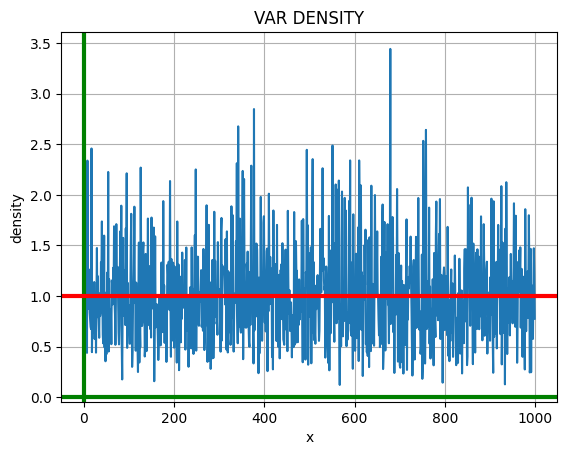

In [7]:
# График оценки дисперсии

x_norm=np.array(generateNumber(N_norm-1))
y_norm=Vars_norm

plt.figure()
plt.plot(x_norm,y_norm)
plt.title('VAR DENSITY')
plt.xlabel('x')
plt.ylabel('density')
plt.grid()
plt.axvline(lw=3,color='g',x=0)
plt.axhline(lw=3,color='g',y=0)
plt.axhline(lw=3,color='r',y=sigma)
plt.show()


                                    Плотность вероятности несмещенной нормированной выборочной дисперсии

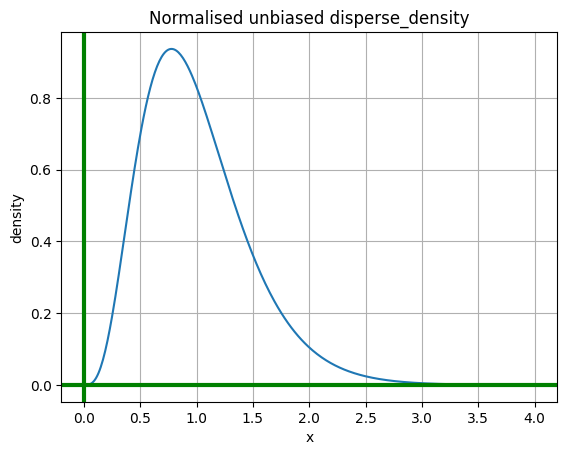

In [8]:
# Теоретическое распределение величины "несмещенная оценка дисперсии/истинную дисперсию в выборке длины N"
def normalised_unbiased_disperse_density(x,T):        
    return (T-1)*sps.chi2.pdf(x*(T-1),df=T-1)   # выборочная дисперсия, деленная на истинную дисперсию

# Визуализация
x_var_theoretic=np.linspace(0,4,401)
y_var_theoretic=np.vectorize(normalised_unbiased_disperse_density)(x_var_theoretic,T_norm)
y_var_theoretic

plt.figure()
plt.plot(x_var_theoretic,y_var_theoretic)
plt.title('Normalised unbiased disperse_density')
plt.xlabel('x')
plt.ylabel('density')
plt.grid()
plt.axvline(lw=3,color='g',x=0)
plt.axhline(lw=3,color='g',y=0)
plt.show()

                                                                Empiric Density

In [9]:
def empiric_density(data, number_breaks, mindata, maxdata):                      # data - np.array(N,);   N=data.shape[0]
    data=np.array(data)
    step=(maxdata-mindata)/number_breaks
    breaks=mindata+step*range(0,number_breaks+1)
    mids=mindata+step/2+step*range(0,number_breaks)
    density=(maxdata-mindata)/(max(data)-min(data))*np.histogram(data,bins=number_breaks,range=(mindata, maxdata),density=True)[0]
    # эмпирическая плотность отнормирована на диапазон - интеграл от плотности на диапазоне равен единице
    return([mids],[density])

In [10]:
data1=Vars_norm/sigma**2
#len_norm=data_norm.shape[0]
Dens_vars_norm=empiric_density(data=data1,number_breaks=round(data1.shape[0]/10),mindata=min(data1),maxdata=max(data1))
Dens_vars_norm

([array([0.1383404 , 0.17154341, 0.20474642, 0.23794943, 0.27115244,
         0.30435545, 0.33755846, 0.37076147, 0.40396448, 0.43716749,
         0.4703705 , 0.50357352, 0.53677653, 0.56997954, 0.60318255,
         0.63638556, 0.66958857, 0.70279158, 0.73599459, 0.7691976 ,
         0.80240061, 0.83560362, 0.86880663, 0.90200964, 0.93521265,
         0.96841566, 1.00161867, 1.03482168, 1.06802469, 1.1012277 ,
         1.13443072, 1.16763373, 1.20083674, 1.23403975, 1.26724276,
         1.30044577, 1.33364878, 1.36685179, 1.4000548 , 1.43325781,
         1.46646082, 1.49966383, 1.53286684, 1.56606985, 1.59927286,
         1.63247587, 1.66567888, 1.69888189, 1.7320849 , 1.76528792,
         1.79849093, 1.83169394, 1.86489695, 1.89809996, 1.93130297,
         1.96450598, 1.99770899, 2.030912  , 2.06411501, 2.09731802,
         2.13052103, 2.16372404, 2.19692705, 2.23013006, 2.26333307,
         2.29653608, 2.32973909, 2.36294211, 2.39614512, 2.42934813,
         2.46255114, 2.49575415, 2

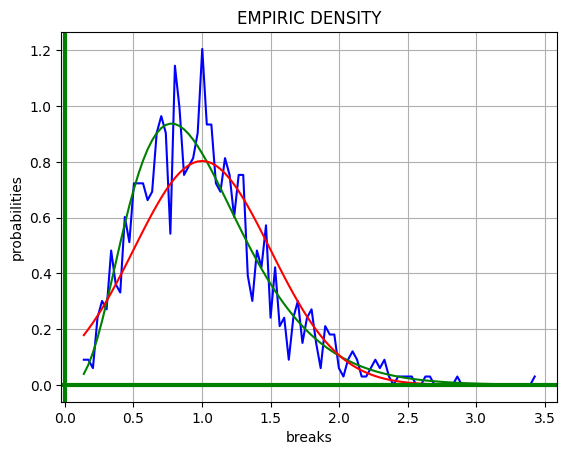

In [11]:
# Visualisation

plt.figure()
X1_vars_norm=list()
Y1_vars_norm=list()
for i in range(Dens_vars_norm[0][0].shape[0]):
    X1_vars_norm.append(np.array(Dens_vars_norm[0])[0,i])
    Y1_vars_norm.append(np.array(Dens_vars_norm[1])[0,i])
Y2_vars_norm=np.vectorize(normalised_unbiased_disperse_density)(X1_vars_norm,T=T_norm)
Y3_vars_norm=np.vectorize(sps.norm.pdf)(X1_vars_norm,loc=sigma,scale=T_norm/(T_norm-1)*2**0.5/T_norm**0.5)
                              
plt.plot(X1_vars_norm,Y1_vars_norm,'b',X1_vars_norm,Y2_vars_norm,'g',X1_vars_norm,Y3_vars_norm,'r')
plt.title('EMPIRIC DENSITY')
plt.xlabel('breaks')
plt.ylabel('probabilities')
plt.grid()
plt.axvline(lw=3,color='g',x=0)
plt.axhline(lw=3,color='g',y=0)
plt.show()

                                   Проверка независимости выборочного среднего и выборочной дисперсии

In [12]:
[np.corrcoef(Means_norm,Vars_norm),np.corrcoef(Means_norm,Stds_norm)]

[array([[ 1.        , -0.01387386],
        [-0.01387386,  1.        ]]),
 array([[ 1.        , -0.01741115],
        [-0.01741115,  1.        ]])]

In [13]:
t_stat_norm=(Means_norm-mu)/(Vars_norm/T_norm)**0.5           # статистика Стьюдента
t_stat_norm.shape

(1000,)

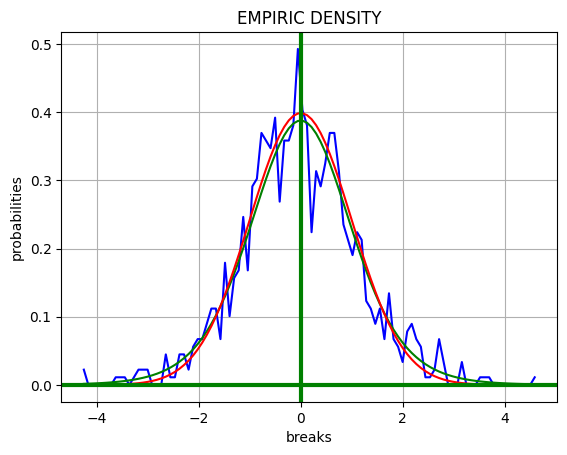

In [28]:

Dens_t_norm=empiric_density(data=t_stat_norm,number_breaks=round(t_stat_norm.shape[0]/10),mindata=min(t_stat_norm),maxdata=max(t_stat_norm))

# Visualisation

plt.figure()
X1_t_norm=list()
Y1_t_norm=list()
for i in range(Dens_t_norm[0][0].shape[0]):
    X1_t_norm.append(np.array(Dens_t_norm[0])[0,i])
    Y1_t_norm.append(np.array(Dens_t_norm[1])[0,i])
Y2_t_norm=np.vectorize(sps.t.pdf)(X1_t_norm,df=T_norm-1)
Y3_t_norm=np.vectorize(sps.norm.pdf)(X1_t_norm)

                              
plt.plot(X1_t_norm,Y1_t_norm,'b',X1_t_norm,Y2_t_norm,'g',X1_t_norm,Y3_t_norm,'r')
plt.title('EMPIRIC DENSITY')
plt.xlabel('breaks')
plt.ylabel('probabilities')
plt.grid()
# plt.xlim(right=2, left=4)
plt.axvline(lw=3,color='g',x=0)
plt.axhline(lw=3,color='g',y=0)
plt.show()

                                          С Л У Ч А Й      Г А М М А     Р А С П Р Е Д Е Л Е Н И Я

In [29]:
alpha=5
N_gamma=1000
T_gamma=20

# Генерация нормальной выборки
Gamma_N_T=np.zeros([N_gamma,T_gamma])
for i in range(N_gamma):
    Gamma_N_T[i,:]=sps.gamma.rvs(a=alpha,size=T_gamma)
    
Means_gamma=np.mean(Gamma_N_T,axis=1)
Vars_gamma=np.var(Gamma_N_T,ddof=1,axis=1)        # несмещенные дисперсии (параметр ddof)
Stds_gamma=np.std(Gamma_N_T,ddof=1,axis=1)

                                                                 Empiric Density

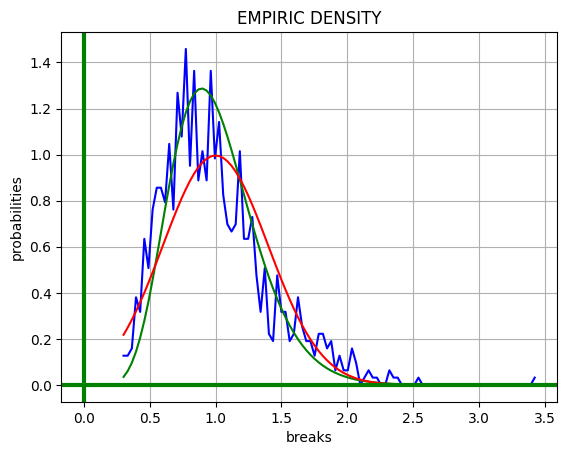

In [30]:
#len_gamma=data_gamma.shape[0]
Dens_gamma=empiric_density(data=Vars_gamma/alpha,number_breaks=round((Vars_gamma/alpha).shape[0]/10),mindata=min(Vars_gamma/alpha),maxdata=max(Vars_gamma/alpha))

# Visualisation

plt.figure()
X1_gamma=list()
Y1_gamma=list()
for i in range(Dens_gamma[0][0].shape[0]):
    X1_gamma.append(np.array(Dens_gamma[0])[0,i])
    Y1_gamma.append(np.array(Dens_gamma[1])[0,i])
Y2_gamma=np.vectorize(normalised_unbiased_disperse_density)(X1_gamma,T=T_gamma)
Y3_gamma=np.vectorize(sps.norm.pdf)(X1_gamma,loc=1,scale=np.std(Vars_gamma/alpha))
                              
plt.plot(X1_gamma,Y1_gamma,'b',X1_gamma,Y2_gamma,'g',X1_gamma,Y3_gamma,'r')
plt.title('EMPIRIC DENSITY')
plt.xlabel('breaks')
plt.ylabel('probabilities')
plt.grid()
#plt.xlim(left=0.8)
#plt.xlim(right=1.2)
plt.axvline(lw=3,color='g',x=0)
plt.axhline(lw=3,color='g',y=0)
plt.show()

                                   Проверка независимости выборочного среднего и выборочной дисперсии

In [31]:
[np.corrcoef(Means_gamma,Vars_gamma),np.corrcoef(Means_gamma,Stds_gamma)]


[array([[1.        , 0.48180874],
        [0.48180874, 1.        ]]),
 array([[1.        , 0.49355578],
        [0.49355578, 1.        ]])]

In [32]:
t_stat_gamma=(Means_gamma-alpha)/(Vars_gamma/T_gamma)**0.5           # статистика Стьюдента

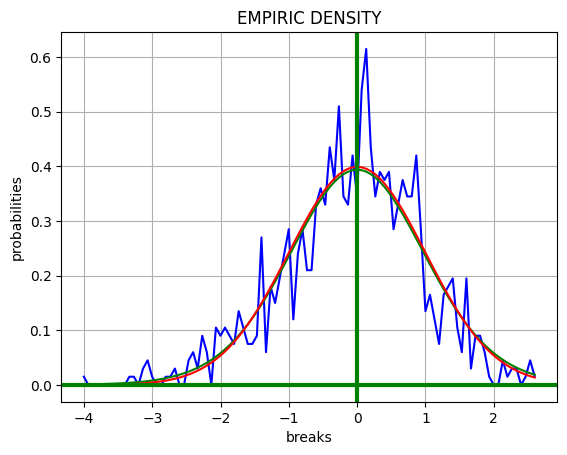

In [19]:
data_t_gamma=t_stat_gamma
len_t_gamma=data_t_gamma.shape[0]
T_t_gamma=T_gamma
Dens_t_gamma=empiric_density(data=data_t_gamma,number_breaks=round(len_t_gamma/10),mindata=min(data_t_gamma),maxdata=max(data_t_gamma))

# Visualisation

plt.figure()
X1_t_gamma=list()
Y1_t_gamma=list()
for i in range(Dens_t_gamma[0][0].shape[0]):
    X1_t_gamma.append(np.array(Dens_t_gamma[0])[0,i])
    Y1_t_gamma.append(np.array(Dens_t_gamma[1])[0,i])
Y2_t_gamma=np.vectorize(sps.t.pdf)(X1_t_gamma,df=T_t_gamma-1)
Y3_t_gamma=np.vectorize(sps.norm.pdf)(X1_t_gamma)

                              
plt.plot(X1_t_gamma,Y1_t_gamma,'b',X1_t_gamma,Y2_t_gamma,'g',X1_t_gamma,Y3_t_gamma,'r')
plt.title('EMPIRIC DENSITY')
plt.xlabel('breaks')
plt.ylabel('probabilities')
plt.grid()
plt.axvline(lw=3,color='g',x=0)
plt.axhline(lw=3,color='g',y=0)
plt.show()

                                  С Л У Ч А Й     Р А В Н О М Е Р Н О Г О     Р А С П Р Е Д Е Л Е Н И Я

In [21]:
teta=1
loc_uni=-teta/2
scale_uni=teta
T_uni=20
N_uni=1000

Uni_N_T=np.zeros([N_uni,T_uni])
for i in range(N_uni):
    Uni_N_T[i,:]=sps.uniform.rvs(loc=loc_uni,scale=scale_uni,size=T_gamma)
    
Means_uni=np.mean(Uni_N_T,axis=1)
Vars_uni=np.var(Uni_N_T,ddof=1,axis=1)        # несмещенные дисперсии (параметр ddof)
Stds_uni=np.std(Uni_N_T,ddof=1,axis=1)


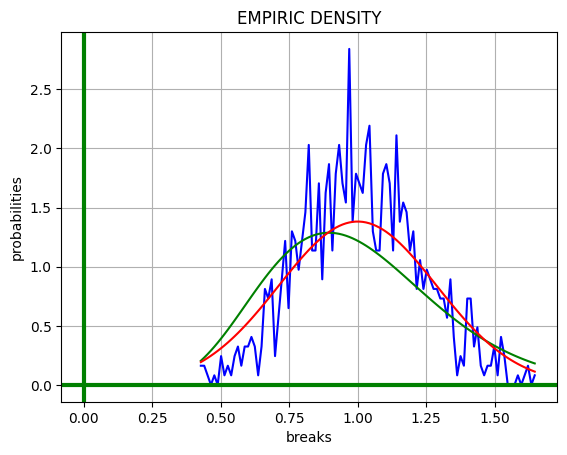

In [22]:
#len_gamma=data_gamma.shape[0]
Dens_uni=empiric_density(data=Vars_uni/(teta**2/12),number_breaks=round(Vars_uni.shape[0]/10),mindata=min(Vars_uni/(teta**2/12)),
                         maxdata=max(Vars_uni/(teta**2/12)))

# Visualisation

plt.figure()
X1_uni=list()
Y1_uni=list()
for i in range(Dens_uni[0][0].shape[0]):
    X1_uni.append(np.array(Dens_uni[0])[0,i])
    Y1_uni.append(np.array(Dens_uni[1])[0,i])
Y2_uni=np.vectorize(normalised_unbiased_disperse_density)(X1_uni,T=T_uni)
Y3_uni=np.vectorize(sps.norm.pdf)(X1_uni,loc=1,scale=(teta**2/12)**0.5)
                              
plt.plot(X1_uni,Y1_uni,'b',X1_uni,Y2_uni,'g',X1_uni,Y3_uni,'r')
plt.title('EMPIRIC DENSITY')
plt.xlabel('breaks')
plt.ylabel('probabilities')
plt.grid()
#plt.xlim(left=0.8)
#plt.xlim(right=1.2)
plt.axvline(lw=3,color='g',x=0)
plt.axhline(lw=3,color='g',y=0)
plt.show()

In [33]:
[np.corrcoef(Means_uni,Vars_uni),np.corrcoef(Means_uni,Stds_uni)]

[array([[ 1.        , -0.03843653],
        [-0.03843653,  1.        ]]),
 array([[ 1.        , -0.04216598],
        [-0.04216598,  1.        ]])]

In [24]:
t_stat_uni=(Means_uni-0)/(Vars_uni/T_uni)**0.5           # статистика Стьюдента

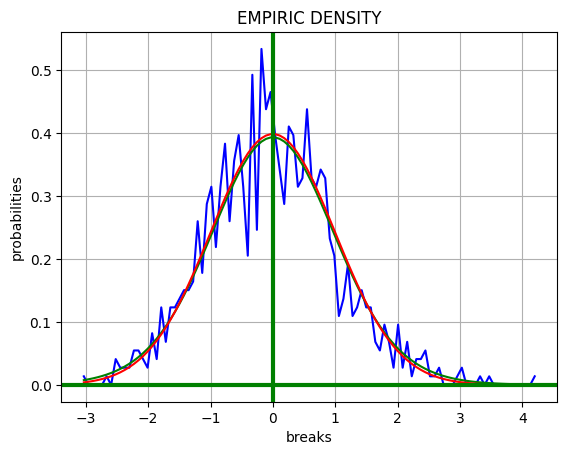

In [25]:
#data_t_gamma=t_stat_gamma
#len_t_gamma=data_t_gamma.shape[0]
#T_t_gamma=T_gamma
Dens_t_uni=empiric_density(data=t_stat_uni,number_breaks=round(t_stat_uni.shape[0]/10),mindata=min(t_stat_uni),maxdata=max(t_stat_uni))

# Visualisation

plt.figure()
X1_t_uni=list()
Y1_t_uni=list()
for i in range(Dens_t_uni[0][0].shape[0]):
    X1_t_uni.append(np.array(Dens_t_uni[0])[0,i])
    Y1_t_uni.append(np.array(Dens_t_uni[1])[0,i])
Y2_t_uni=np.vectorize(sps.t.pdf)(X1_t_uni,df=T_t_gamma-1)
Y3_t_uni=np.vectorize(sps.norm.pdf)(X1_t_uni)

                              
plt.plot(X1_t_uni,Y1_t_uni,'b',X1_t_uni,Y2_t_uni,'g',X1_t_uni,Y3_t_uni,'r')
plt.title('EMPIRIC DENSITY')
plt.xlabel('breaks')
plt.ylabel('probabilities')
plt.grid()
plt.axvline(lw=3,color='g',x=0)
plt.axhline(lw=3,color='g',y=0)
plt.show()

In [37]:
DJ=pyreadr.read_r("US_EQUITIES.RData")   # словарь, полученный из данных R
CLOSE_DAILY=DJ['CLOSE_DAILY']                                     #  DataFrame цен, полученная по выбору ключа словаря
PRICES=CLOSE_DAILY.to_numpy()                                     #  Массив цен
RET=np.diff(np.log(PRICES),axis=0)                                #  Доходности

array([[ 0.02195292,  0.01373723, -0.00731634, ..., -0.00843889,
         0.00644674, -0.01893403],
       [-0.00714667, -0.00405074, -0.01327188, ..., -0.01307948,
        -0.00682728,  0.00712523],
       [ 0.00492615, -0.0122513 ,  0.00942606, ..., -0.00746915,
         0.01454642, -0.00808827],
       ...,
       [ 0.00222279,  0.00145985, -0.00497163, ..., -0.0104817 ,
        -0.01161851,  0.00219701],
       [-0.00131923,  0.0244969 ,  0.01219371, ...,  0.00413976,
         0.00943893,  0.02027586],
       [-0.0018776 ,  0.0349686 , -0.00126324, ..., -0.00405678,
        -0.00595753, -0.02039773]])

In [39]:
m = 4
t0 = 2598
ret = RET[t0:(t0 + 20), m]
ret

array([-0.00619806, -0.00459164,  0.00131403,  0.00229552,  0.0036781 ,
        0.00122303, -0.00851069,  0.00131403, -0.00791039,  0.00791044,
        0.00262297, -0.01451216,  0.00232288,  0.00198676, -0.00165536,
        0.00660501, -0.00759954, -0.00365506,  0.00099814, -0.00199734])

In [42]:
M=np.mean(ret)
S=np.std(ret, ddof=1)
t=sps.t.ppf(q=0.975, df=19)
left=M-t*S/20**0.5
right=M+t*S/20**0.5
[left, right]

[-0.0038489640984220768, 0.0014130306183969671]

In [44]:
mu=np.mean(RET[:, m])
mu

7.40815543695685e-05